In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_ = df.drop(['petal length (cm)', 'petal width (cm)'], axis = 'columns')
df_.shape

(150, 2)

Text(0, 0.5, 'sepal width (cm)')

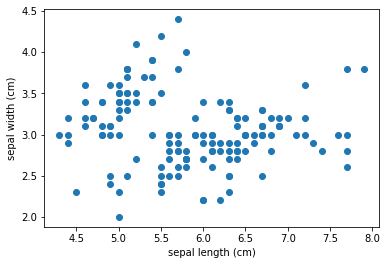

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df_['sepal length (cm)'], df_['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_[['sepal length (cm)']])
df_['sepal length (cm)'] = scaler.transform(df_[['sepal length (cm)']])

scaler.fit(df_[['sepal width (cm)']])
df_['sepal width (cm)'] = scaler.transform(df_[['sepal width (cm)']])

df_.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


Text(0, 0.5, 'sepal width (cm)')

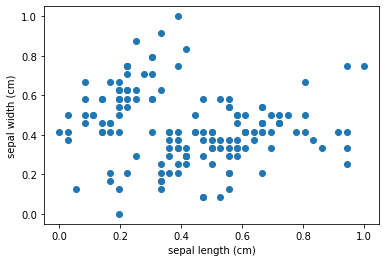

In [15]:
plt.scatter(df_['sepal length (cm)'], df_['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

### Elbow Plot to determine K 

In [24]:
from sklearn.cluster import KMeans

sse = [] # sum of square error 
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df_)
    sse.append(km.inertia_) # km.inertia is the sse 
    
sse

[12.797757201646087,
 6.85529052603328,
 4.115194202754064,
 3.217483856523378,
 2.570290203745023,
 2.100061570560457,
 1.8148197915135778,
 1.5610815894219108,
 1.2688256922081358]

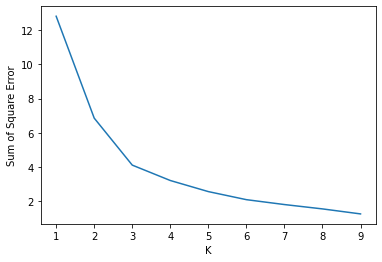

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, sse)

# K = 3

In [31]:
km = KMeans(n_clusters = 3)
predicted = km.fit_predict(df_)
df_['cluster'] = predicted
df_.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2


In [27]:
km.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.19897959, 0.60459184],
       [0.40483539, 0.28009259]])

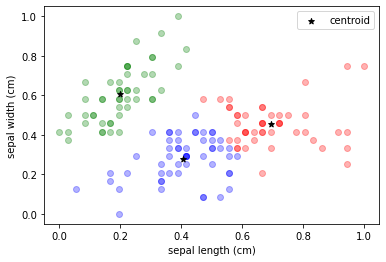

In [38]:
df0 = df_[df_.cluster == 0]
df1 = df_[df_.cluster == 1]
df2 = df_[df_.cluster == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'blue', alpha = 0.3)
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', alpha = 0.3)
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', alpha = 0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend()


In [40]:
df_['target'] = iris.target
df_.head()

,sepal length (cm),sepal width (cm),cluster,target
0,0.222222,0.625000,2,0
1,0.166667,0.416667,2,0
2,0.111111,0.500000,2,0
3,0.083333,0.458333,2,0
4,0.194444,0.666667,2,0


Text(0, 0.5, 'sepal width (cm)')

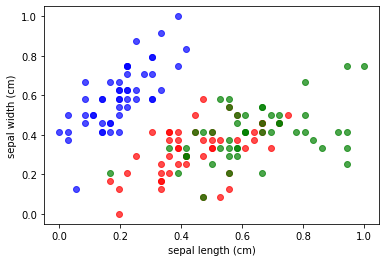

In [43]:
df0 = df_[df_.target == 0]
df1 = df_[df_.target == 1]
df2 = df_[df_.target == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'blue', alpha = 0.7)
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', alpha = 0.7)
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', alpha = 0.7)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
